In [47]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro, levene
from scipy.stats import chi2_contingency
df= pd.read_excel('yulu casestudy.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
cas

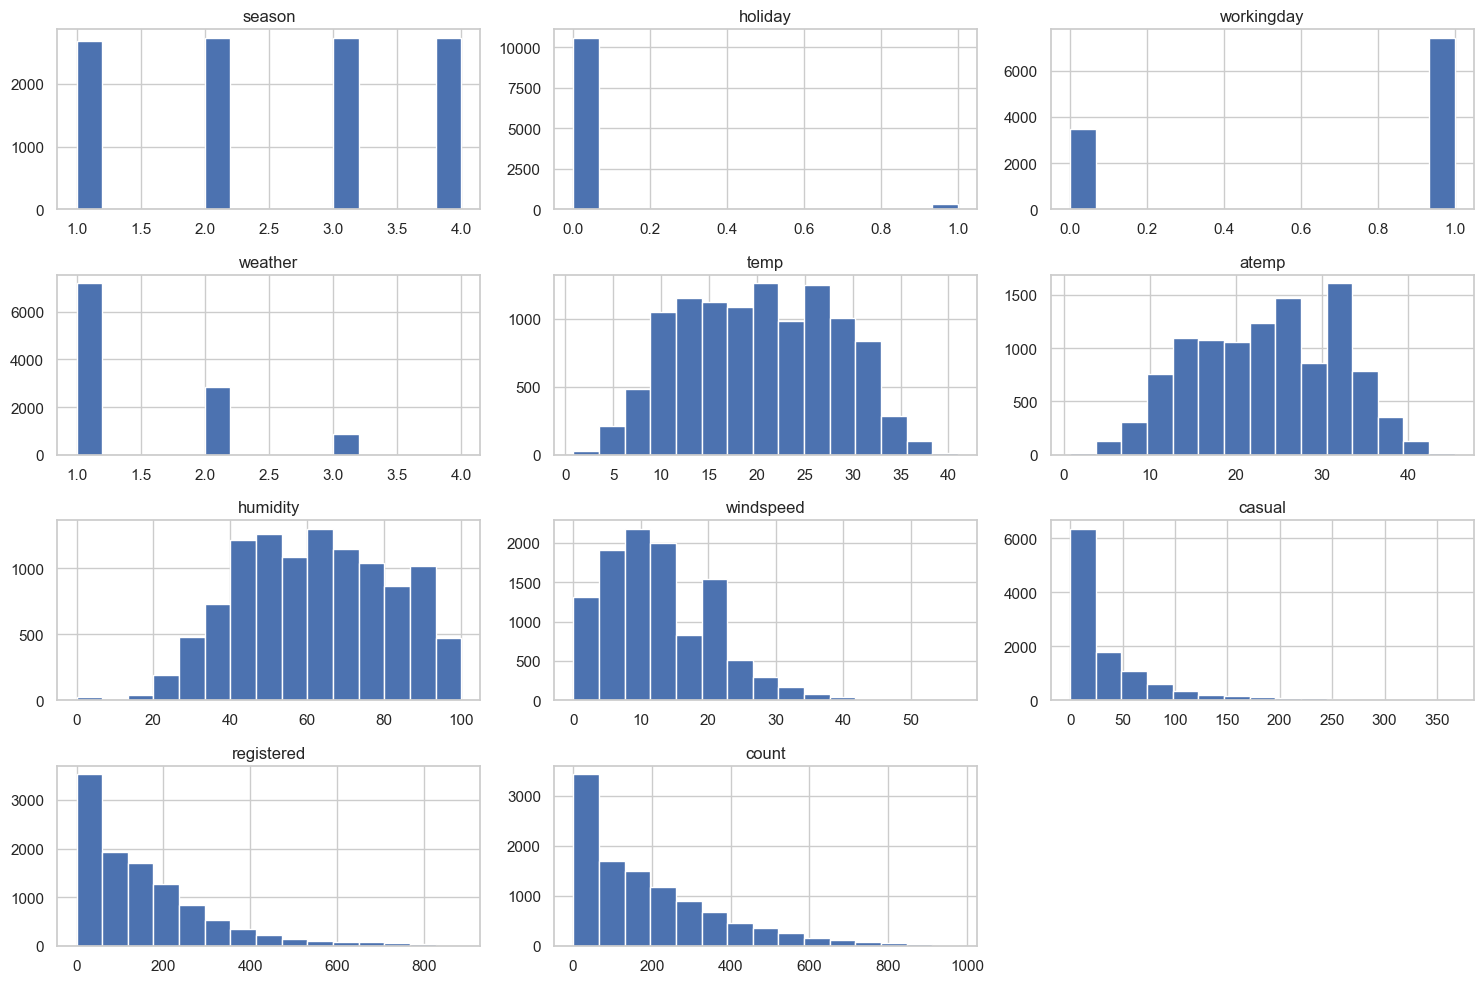

<Figure size 800x400 with 0 Axes>

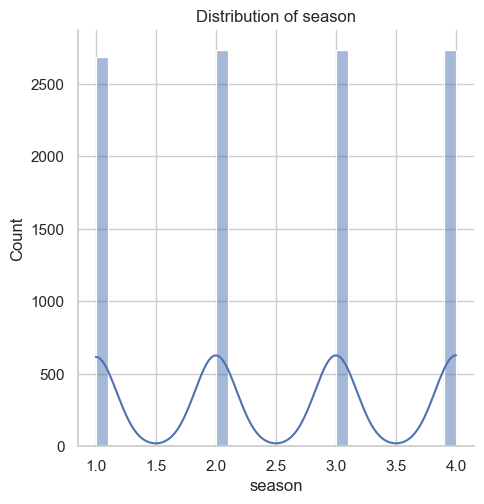

<Figure size 800x400 with 0 Axes>

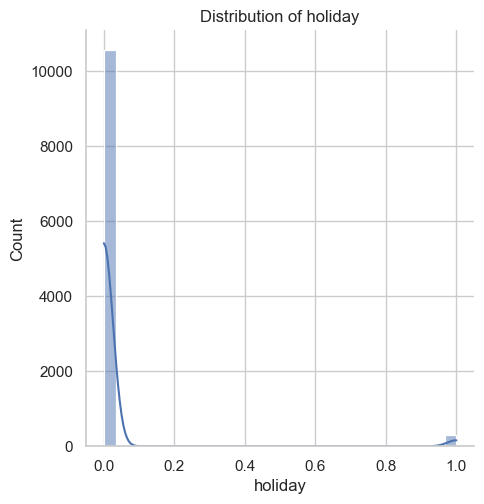

<Figure size 800x400 with 0 Axes>

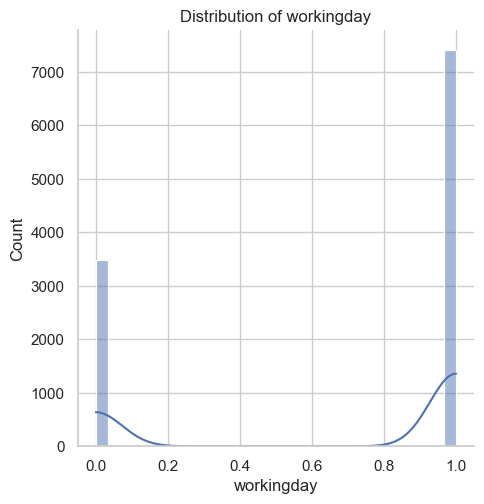

<Figure size 800x400 with 0 Axes>

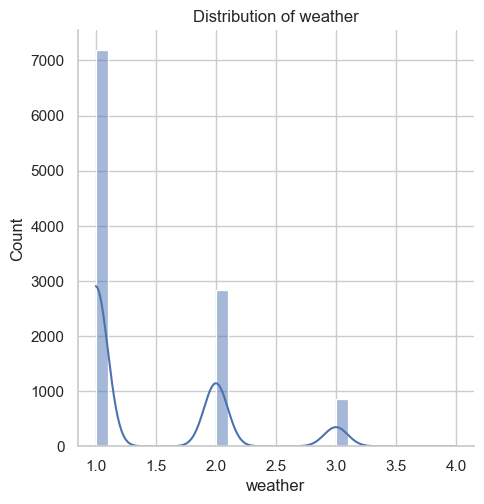

<Figure size 800x400 with 0 Axes>

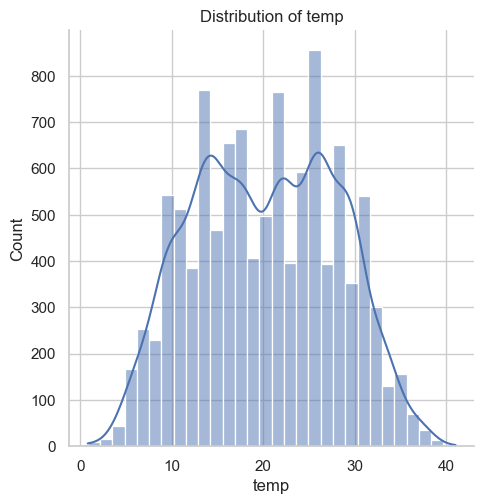

<Figure size 800x400 with 0 Axes>

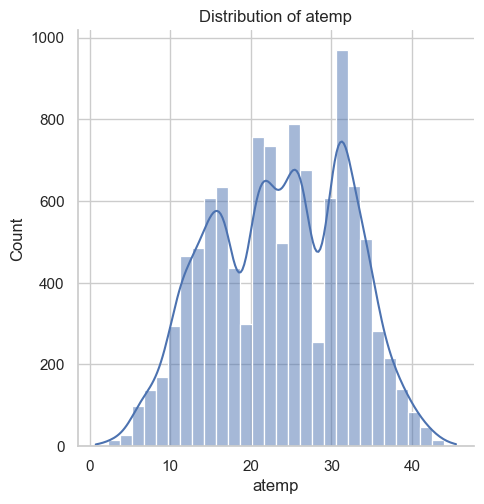

<Figure size 800x400 with 0 Axes>

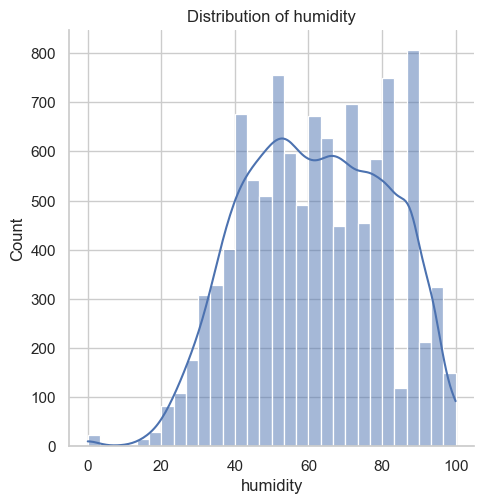

<Figure size 800x400 with 0 Axes>

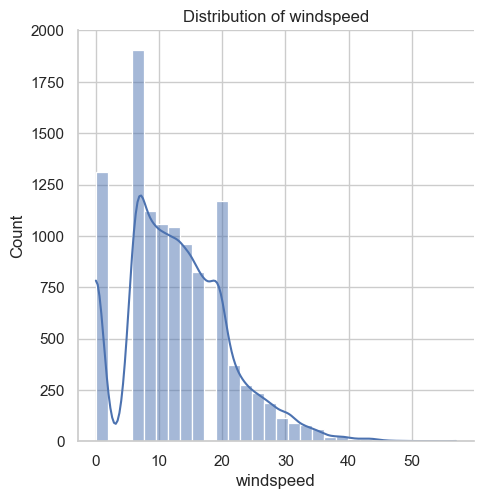

<Figure size 800x400 with 0 Axes>

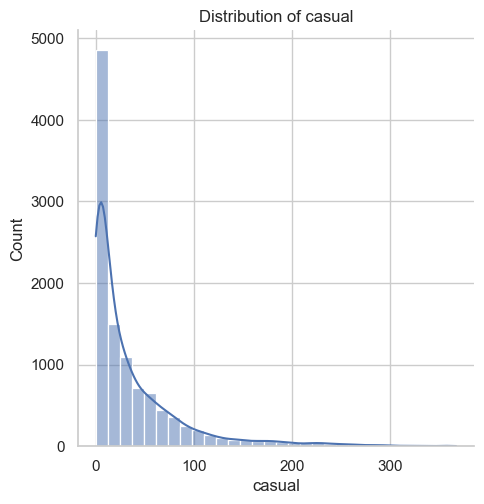

<Figure size 800x400 with 0 Axes>

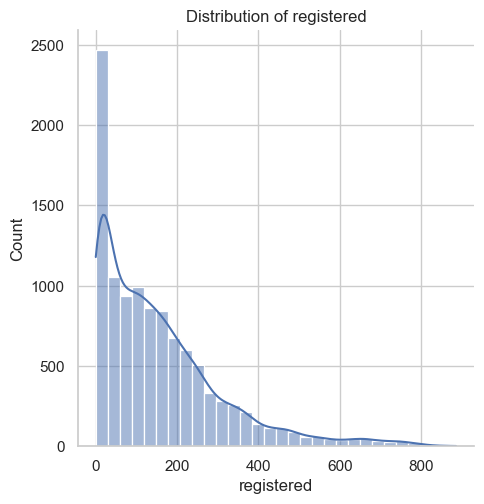

<Figure size 800x400 with 0 Axes>

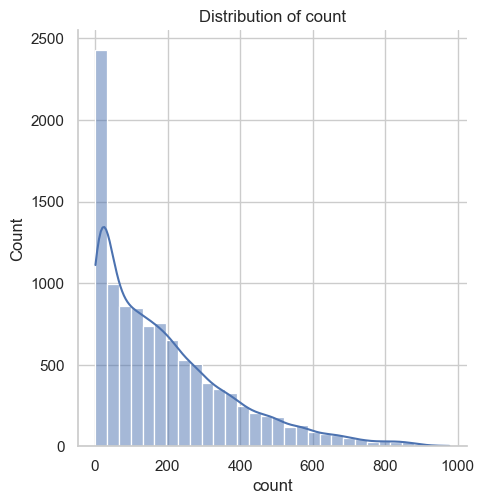

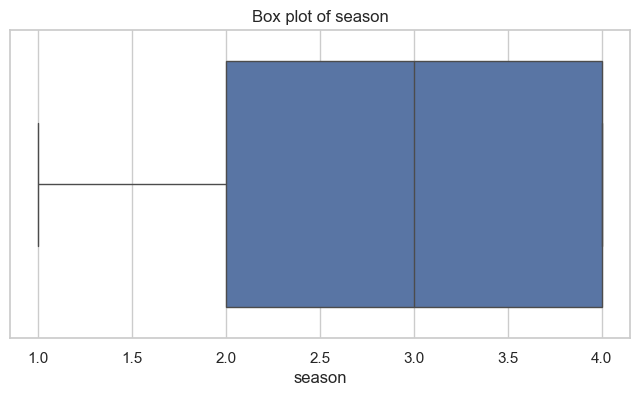

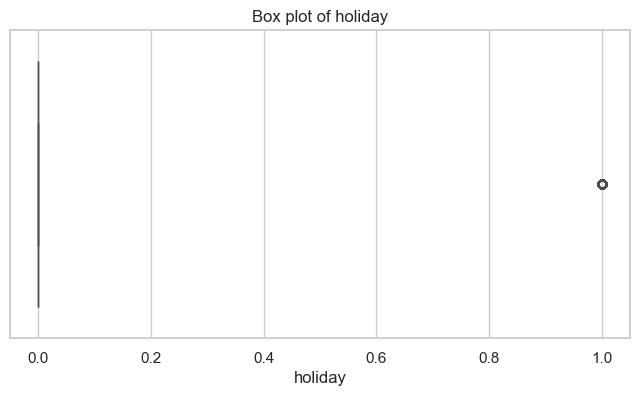

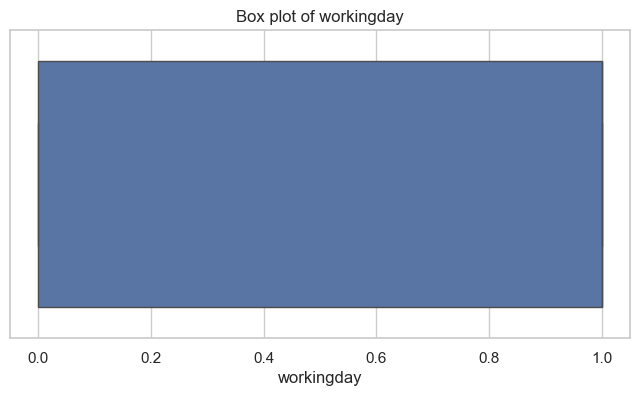

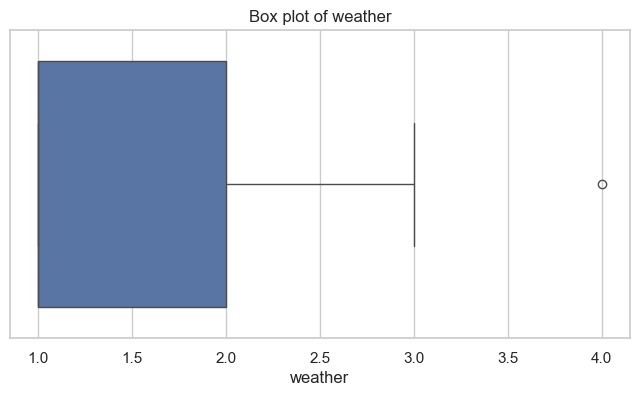

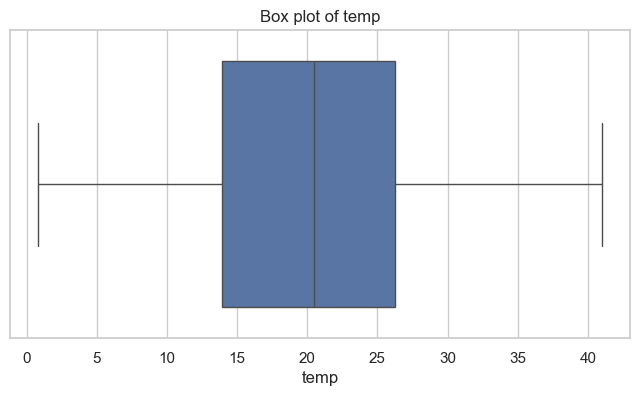

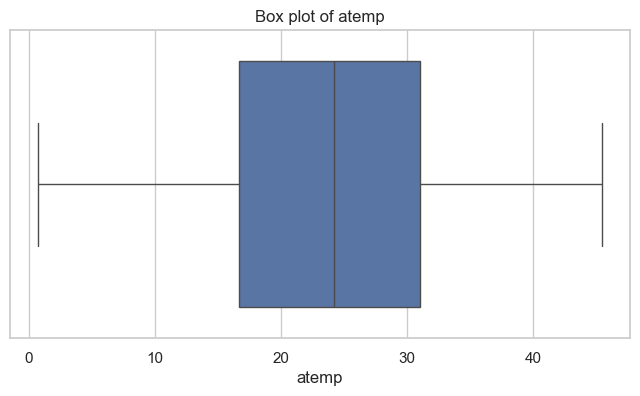

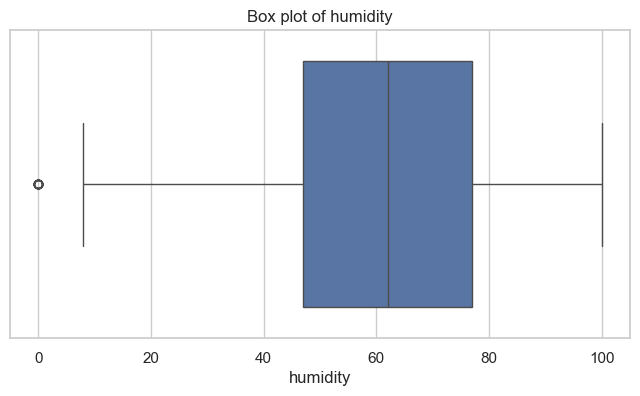

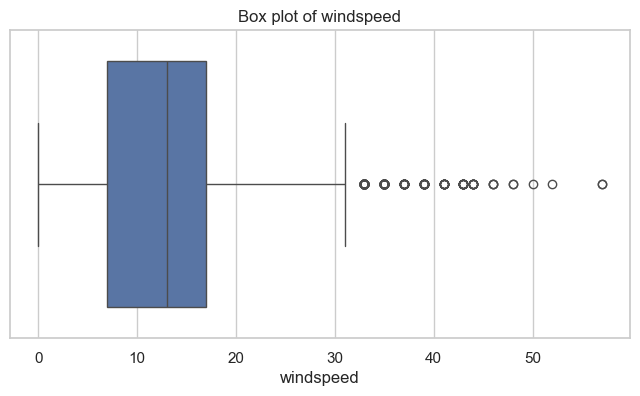

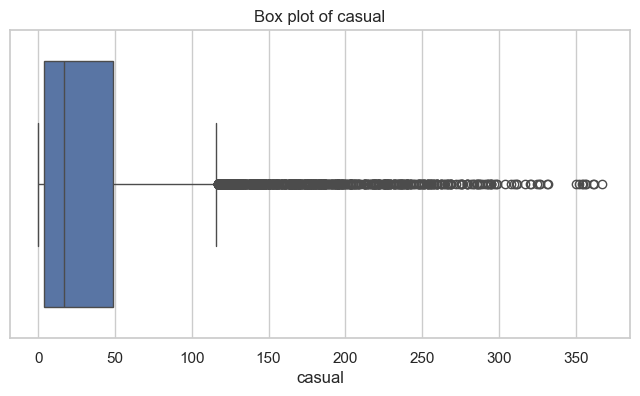

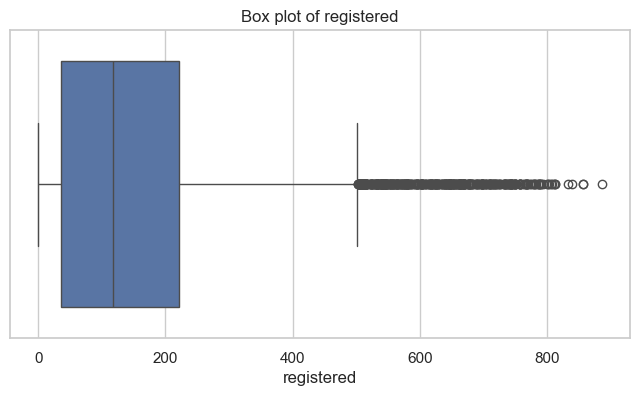

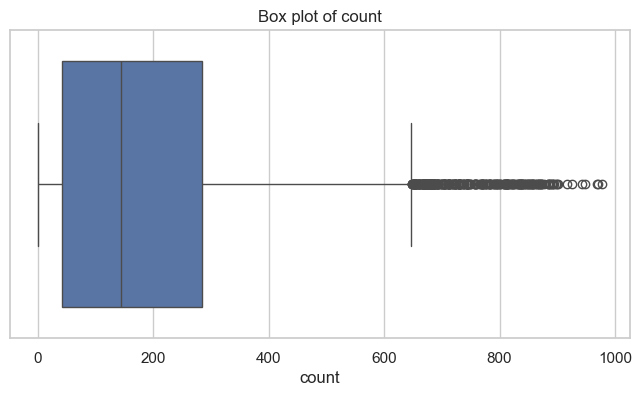

In [48]:
df
df.shape
df.describe
df.info()
missing_values=df.isnull()
print(missing_values.sum())
df_filled = df.fillna(df.mean())

# Identify duplicate records
duplicates = df_filled.duplicated()
print("Number of duplicate records: ", duplicates.sum())

df= df_filled.drop_duplicates()
print("Number of records after removing duplicates: ", df.shape[0])

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(len(numerical_cols)//3 + 1, 3))
plt.tight_layout()
plt.show()

# Plot distribution plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.displot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


categorical_cols = df.select_dtypes(include=['object']).columns


for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f'Pie chart of {col}')
    plt.ylabel('')
    plt.show()

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each numerical column
for col in numerical_cols:
    df = remove_outliers(df, col)

# Optionally, you can clip the outliers instead of removing them
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)

# Clip outliers for each numerical column
for col in numerical_cols:
    clip_outliers(df, col)



In [ ]:
conclusion:

Outliers Detection and Handling

Box Plots:
Box plots for numerical columns help in identifying outliers. The presence of outliers is indicated by points outside the whiskers.

Outliers Removal:
Outliers were removed using the Interquartile Range (IQR) method, ensuring that extreme values do not skew the analysis.

Outliers Clipping:
Optionally, outliers were clipped to lie within the bounds defined by 1.5 times the IQR, ensuring that data points remain within a reasonable range.

Data Quality:

The dataset was cleaned by handling missing values and removing duplicate records, which enhances the reliability of the analysis.
Outliers were effectively managed, either by removal or clipping, to ensure they do not disproportionately affect the results.

Distributions and Patterns:

The distribution analysis of numerical and categorical variables provides insights into the central tendencies and variability of the data.
Understanding these distributions can inform further analysis and model building, as it highlights the natural behavior of the data.

Feature Engineering: Based on the distributions, additional features can be engineered to capture underlying patterns in the data.

Model Building: With a cleaned dataset, machine learning models can be developed and trained to make predictions or identify trends.

Further Analysis: Additional statistical tests and visualizations can be performed to delve deeper into specific aspects of the dataset.

In [ ]:
Recommendations:
1. Regular Data Cleaning: Establish a routine for regularly cleaning the data to handle missing values and duplicates as new data is added.
2. Monitor for Outliers: Continuously monitor for outliers in the data, especially if new data points are regularly added, to ensure ongoing data quality.
3. Data Visualization: Utilize data visualization techniques regularly to keep track of data distribution and identify any unusual patterns early.

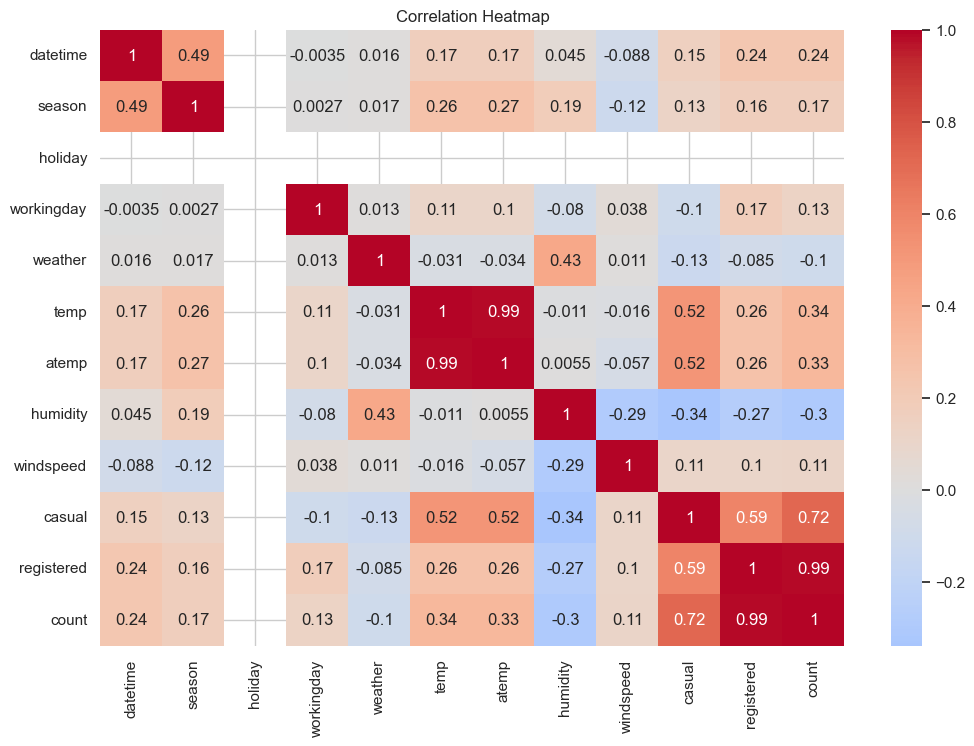

Dropped columns: ['temp', 'registered']


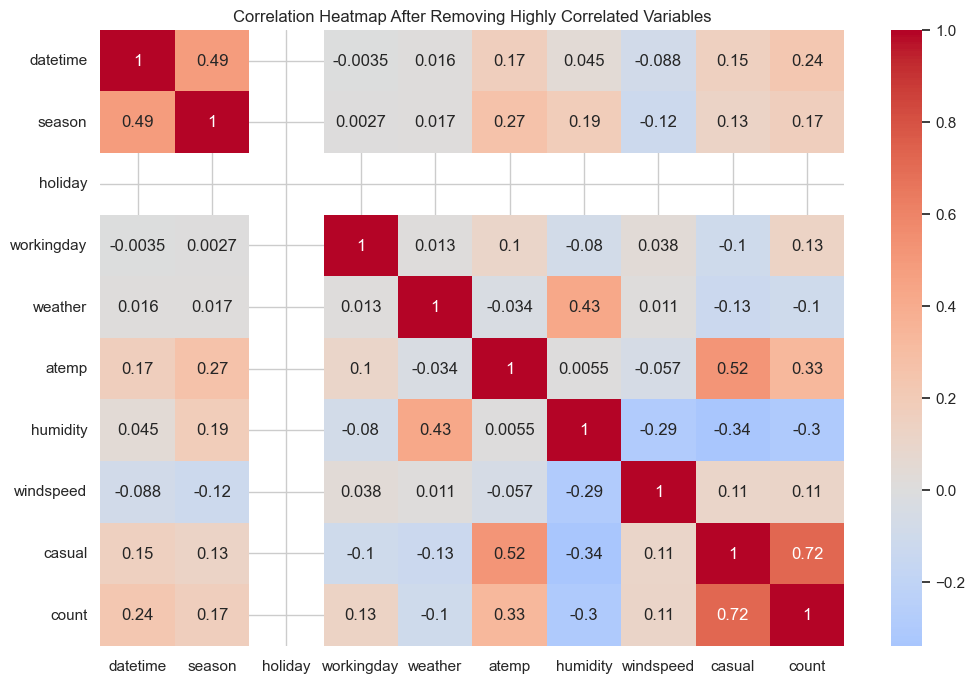

In [49]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Function to remove highly correlated variables
def remove_highly_correlated_vars(df, threshold=0.8):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()
    
    # Create a mask to ignore the upper triangle (self-correlations are also set to False)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    tri_df = corr_matrix.mask(mask)
    
    # Find features with a correlation above the threshold
    to_drop = [c for c in tri_df.columns if any(tri_df[c] > threshold)]
    
    # Drop features from the original dataframe
    df_reduced = df.drop(to_drop, axis=1)
    
    return df_reduced, to_drop

# Apply the function to your dataframe
df_reduced, dropped_columns = remove_highly_correlated_vars(df)

# Print the dropped columns
print(f'Dropped columns: {dropped_columns}')

# Show the updated correlation heatmap after removing highly correlated variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_reduced.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap After Removing Highly Correlated Variables')
plt.show()


In [ ]:
Purpose:

The correlation heatmap is used to visualize the correlation coefficients between numerical variables in the dataset.
It helps identify the strength and direction of relationships between pairs of variables.

Interpretation:

Values close to 1 or -1 indicate strong correlations, either positive (direct relationship) or negative (inverse relationship).
Values close to 0 indicate weak or no correlation.
The heatmap uses a color scale (e.g., coolwarm), where different colors represent the range of correlation coefficients from -1 to 1.
Annotated values provide exact correlation coefficients, making it easy to identify significant correlations at a glance.

Updated Correlation Heatmap
Purpose:

The updated heatmap visualizes the correlation matrix of the reduced dataset after removing highly correlated variables.
It helps verify that the remaining variables have lower correlations with each other.
Interpretation:

The updated heatmap should show fewer high-correlation pairs, indicating reduced multicollinearity.
The new correlations should ideally be below the specified threshold (0.8), confirming that the variable reduction was successful.

In [ ]:
Recommendations:
1. By addressing multicollinearity, models built on this dataset will likely have more reliable and interpretable coefficients.
2. The removal of redundant variables can also enhance the computational efficiency of model training.
3.Regularly update and review correlation heatmaps to ensure that the dataset remains free of problematic correlations.
4. Utilize other visualization techniques (e.g., pair plots) to gain deeper insights into variable relationships.

T-statistic: 13.472278532012362, P-value: 1.0201006698784579e-40
Reject the null hypothesis (H0). There is a significant difference in the number of bike rides between weekdays and weekends.


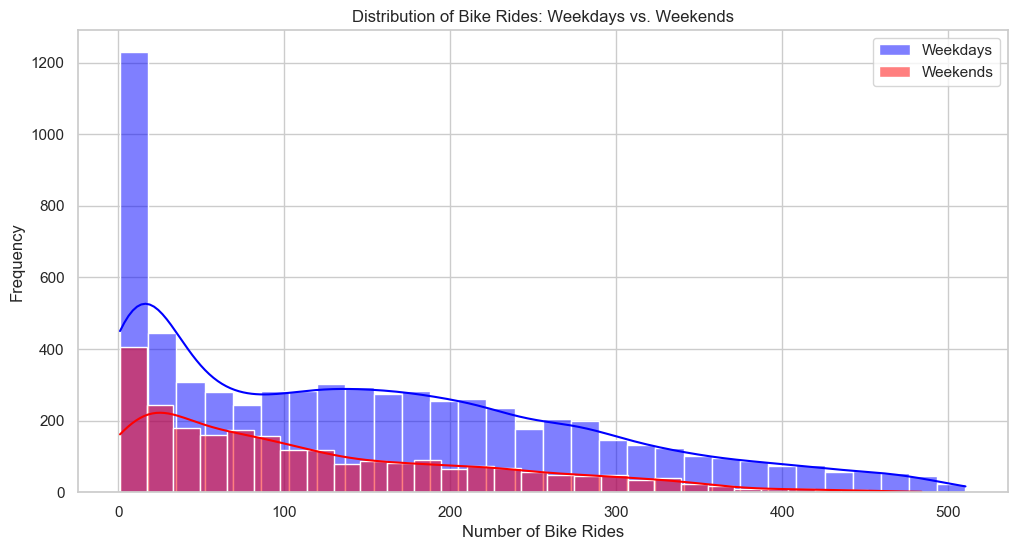

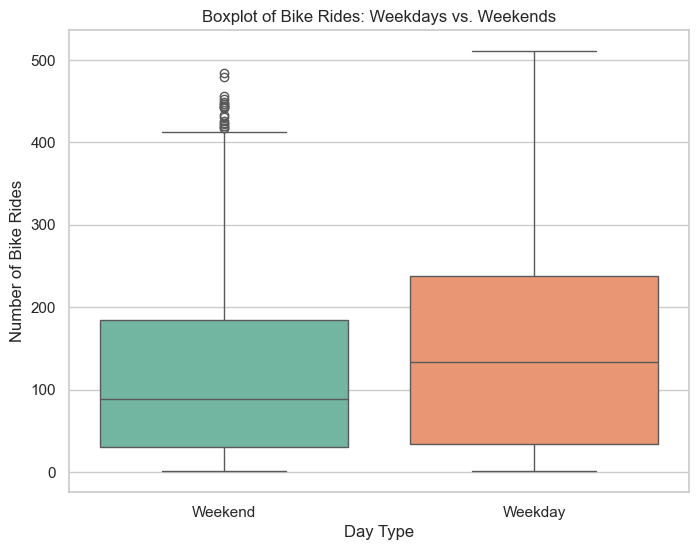

In [50]:
df['date'] = pd.to_datetime(df['datetime'])

# Create a new column 'day_of_week' to identify weekdays and weekends
df['day_of_week'] = df['date'].dt.dayofweek

# Separate data into weekdays (0-4) and weekends (5-6)
weekdays_data = df[df['day_of_week'] < 5]['count']
weekends_data = df[df['day_of_week'] >= 5]['count']

# Perform the 2-sample independent t-test
t_stat, p_value = stats.ttest_ind(weekdays_data, weekends_data, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Set the significance level
alpha = 0.05

if p_value <= alpha:
    print("Reject the null hypothesis (H0). There is a significant difference in the number of bike rides between weekdays and weekends.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant difference in the number of bike rides between weekdays and weekends.")

sns.set(style="whitegrid")

# Histogram for Weekdays and Weekends
plt.figure(figsize=(12, 6))

# Weekdays
sns.histplot(weekdays_data, kde=True, color='blue', label='Weekdays', bins=30)

# Weekends
sns.histplot(weekends_data, kde=True, color='red', label='Weekends', bins=30)

plt.title('Distribution of Bike Rides: Weekdays vs. Weekends')
plt.xlabel('Number of Bike Rides')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Combine the data for the boxplot
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

plt.figure(figsize=(8, 6))
sns.boxplot(x='day_type', y='count', hue='day_type', data=df, palette='Set2', legend=False)

plt.title('Boxplot of Bike Rides: Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Bike Rides')
plt.show()

In [ ]:
T-test for Weekdays vs. Weekends
Purpose:

To determine if there is a significant difference in the number of bike rides between weekdays and weekends.
Hypotheses:

Null Hypothesis (H0): There is no significant difference in the number of bike rides between weekdays and weekends.
Alternative Hypothesis (H1): There is a significant difference in the number of bike rides between weekdays and weekends.
Statistical Test:

A 2-sample independent t-test was used to compare the means of the two groups (weekdays and weekends).
Results:

T-statistic: The calculated t-statistic value.
P-value: The probability of observing the test results under the null hypothesis.
If the p-value is less than or equal to the significance level (alpha = 0.05), we reject the null hypothesis.

Interpretation:

If the p-value is less than 0.05, there is enough evidence to reject the null hypothesis, indicating a 
significant difference in the number of bike rides between weekdays and weekends.

If the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating no significant difference.

In [ ]:
Recommendations:

If a significant difference is found, bike rental companies can consider adjusting operations, marketing strategies, and resource allocation
based on the varying demand on weekdays and weekends.
If no significant difference is found, it suggests a more consistent demand throughout the week, allowing for uniform resource management.

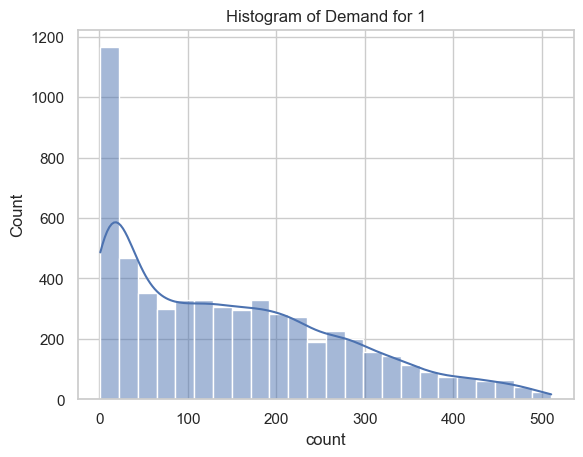

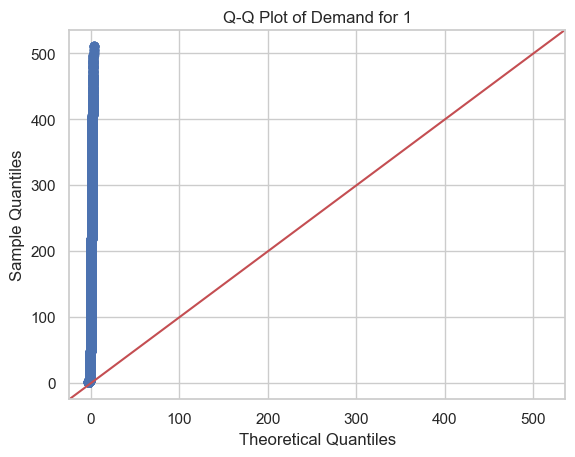

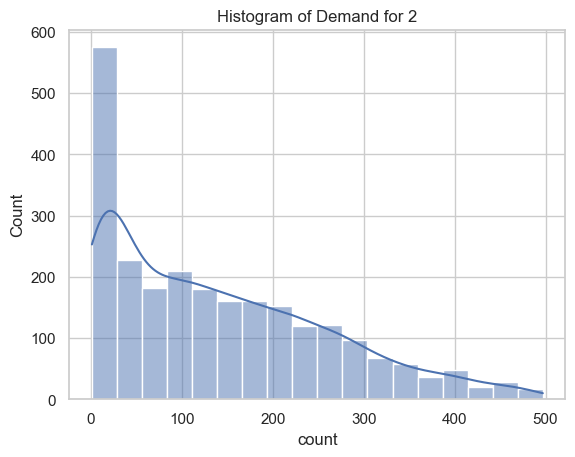

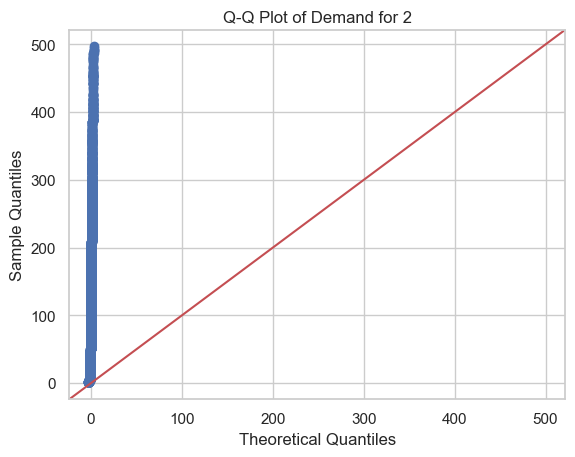

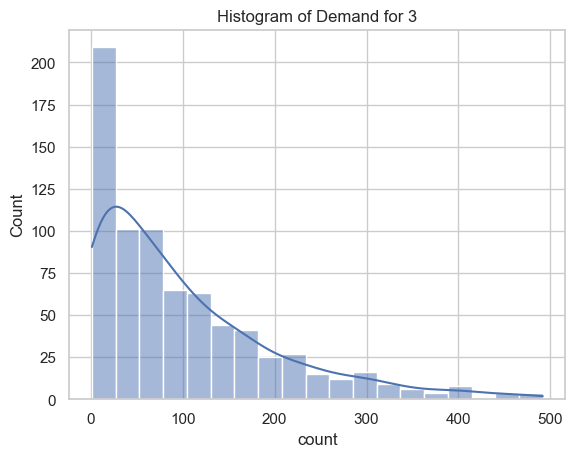

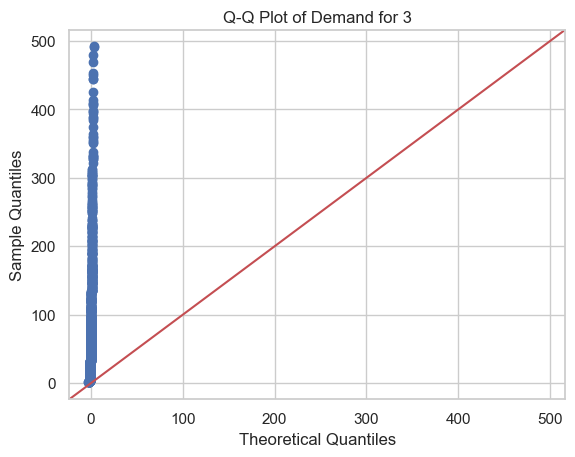

Skewness for 1: 0.6959601567082596
Kurtosis for 1: -0.3825325805317079
Skewness for 2: 0.7694520379846901
Kurtosis for 2: -0.2152116451746835
Skewness for 3: 1.4360036581521871
Kurtosis for 3: 1.8628207814829345
Shapiro-Wilk test for 1: Statistics=0.9221016466058969, p=6.96761892907537e-48
Shapiro-Wilk test for 2: Statistics=0.9176442090914525, p=1.178490629397003e-34
Shapiro-Wilk test for 3: Statistics=0.8506652506232382, p=4.3554413413328574e-26
Levene’s test: Statistics=59.53865619100904, p=2.0448511993772051e-26
                  sum_sq      df          F        PR(>F)
C(weather)  1.697459e+06     2.0  56.932966  2.679020e-25
Residual    1.354498e+08  9086.0        NaN           NaN
Reject the null hypothesis (H0). There is a significant difference in the demand for bicycles on rent across different weather conditions.


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5875.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\HP\AppData\Local\Temp\ipykernel_1928\3930202520.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


In [51]:
weather_conditions = df['weather'].unique()
for condition in weather_conditions:
    plt.figure()
    sns.histplot(df[df['weather'] == condition]['count'], kde=True)
    plt.title(f'Histogram of Demand for {condition}')
    
    sm.qqplot(df[df['weather'] == condition]['count'], line='45')
    plt.title(f'Q-Q Plot of Demand for {condition}')
    plt.show()

# Skewness and Kurtosis
for condition in weather_conditions:
    data = df[df['weather'] == condition]['count']
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    print(f'Skewness for {condition}: {skewness}')
    print(f'Kurtosis for {condition}: {kurtosis}')

# Shapiro-Wilk's test with check for data length
for condition in weather_conditions:
    data = df[df['weather'] == condition]['count']
    if len(data) >= 3:
        stat, p = shapiro(data)
        print(f'Shapiro-Wilk test for {condition}: Statistics={stat}, p={p}')
    else:
        print(f'Shapiro-Wilk test for {condition}: Not enough data points (less than 3)')

# Levene’s test
stat, p = levene(*(df[df['weather'] == condition]['count'] for condition in weather_conditions))
print(f'Levene’s test: Statistics={stat}, p={p}')

# One-way ANOVA
model = ols('count ~ C(weather)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Set the significance level
alpha = 0.05

p_value = anova_table['PR(>F)'][0]

if p_value <= alpha:
    print("Reject the null hypothesis (H0). There is a significant difference in the demand for bicycles on rent across different weather conditions.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant difference in the demand for bicycles on rent across different weather conditions.")


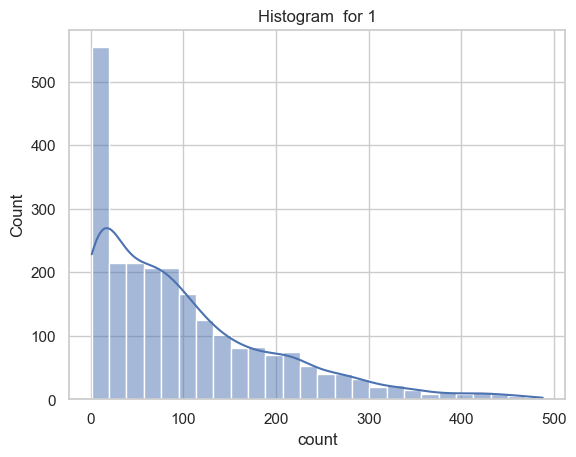

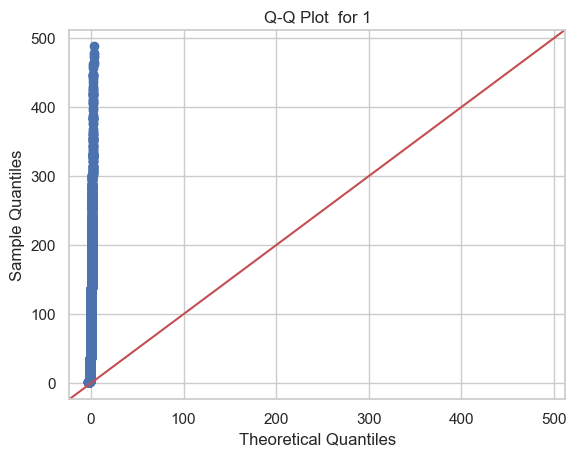

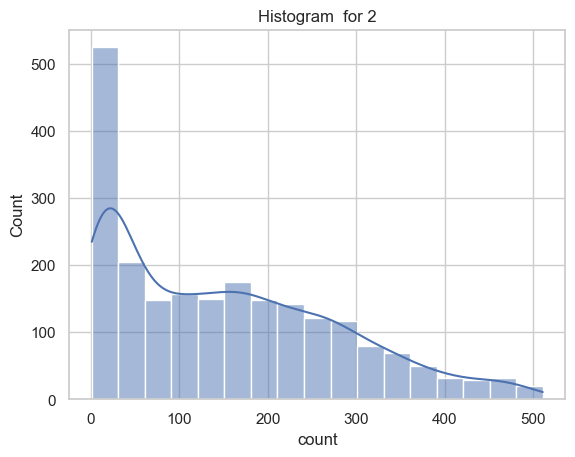

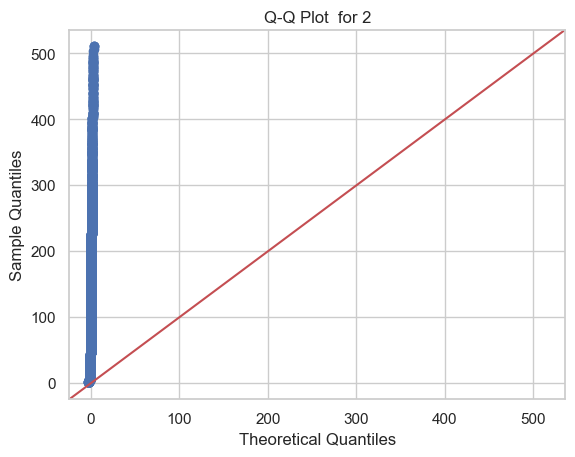

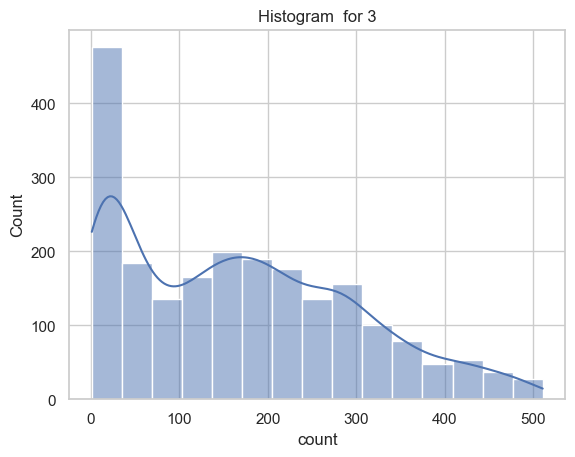

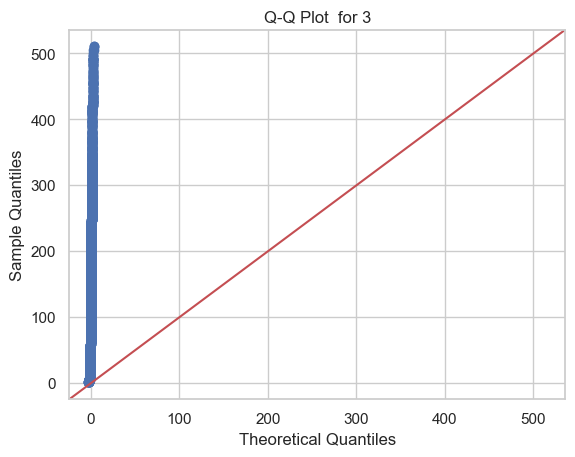

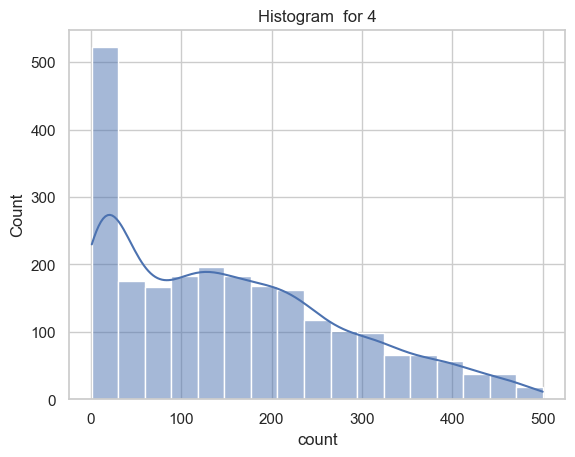

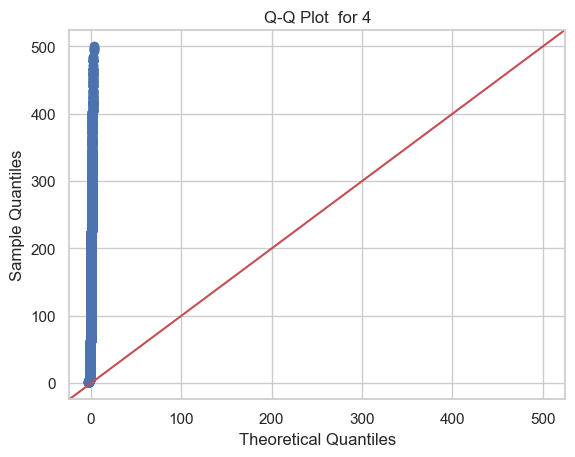

Skewness for 1: 1.2794286803065023
Kurtosis for 1: 1.371746894525419
Skewness for 2: 0.662147693207085
Kurtosis for 2: -0.4413605068359523
Skewness for 3: 0.5025124481239047
Kurtosis for 3: -0.646470803580316
Skewness for 4: 0.6250410748056827
Kurtosis for 4: -0.4918988235670607
Shapiro-Wilk test for 1: Statistics=0.8720657966211796, p=2.1011452956854775e-40
Shapiro-Wilk test for 2: Statistics=0.9223542598934203, p=3.014954176750589e-32
Shapiro-Wilk test for 3: Statistics=0.9383824029511534, p=4.6357388052508615e-29
Shapiro-Wilk test for 4: Statistics=0.9307977872613188, p=1.0565909222196008e-31
Levene’s test: Statistics=124.41963056092965, p=5.610925067098092e-79
                 sum_sq      df           F        PR(>F)
C(season)  6.062932e+06     3.0  140.066967  1.015572e-88
Residual   1.310843e+08  9085.0         NaN           NaN
Reject the null hypothesis (H0). There is a significant difference in the demand for bicycles on rent across different seasons.


C:\Users\HP\AppData\Local\Temp\ipykernel_1928\2801556726.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


In [52]:
seasons = df['season'].unique()
for season in seasons:
    plt.figure()
    sns.histplot(df[df['season'] == season]['count'], kde=True)
    plt.title(f'Histogram  for {season}')
    
    sm.qqplot(df[df['season'] == season]['count'], line='45')
    plt.title(f'Q-Q Plot  for {season}')
    plt.show()

# Skewness and Kurtosis
for season in seasons:
    data = df[df['season'] == season]['count']
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    print(f'Skewness for {season}: {skewness}')
    print(f'Kurtosis for {season}: {kurtosis}')

# Shapiro-Wilk's test with check for data length
for season in seasons:
    data = df[df['season'] == season]['count']
    if len(data) >= 3:
        stat, p = shapiro(data)
        print(f'Shapiro-Wilk test for {season}: Statistics={stat}, p={p}')
    else:
        print(f'Shapiro-Wilk test for {season}: Not enough data points (less than 3)')

# Levene’s test
stat, p = levene(*(df[df['season'] == season]['count'] for season in seasons))
print(f'Levene’s test: Statistics={stat}, p={p}')

# One-way ANOVA
model = ols('count ~ C(season)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Set the significance level
alpha = 0.05

p_value = anova_table['PR(>F)'][0]

if p_value <= alpha:
    print("Reject the null hypothesis (H0). There is a significant difference in the demand for bicycles on rent across different seasons.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant difference in the demand for bicycles on rent across different seasons.")


In [ ]:
Histograms:
Histograms show the distribution of bike rental counts (count) for each season (spring, summer, fall, winter).
The kde=True argument adds a kernel density estimate line to visualize the distribution's shape.

Q-Q Plots:
Q-Q (Quantile-Quantile) plots compare the distribution of the data against a theoretical normal distribution.
The line='45' argument adds a diagonal line to help assess deviations from normality.

Skewness and Kurtosis:

Skewness measures the asymmetry of the distribution.
Skewness = 0 indicates a perfectly symmetrical distribution.
Skewness > 0 indicates a right-skewed (positively skewed) distribution.
Skewness < 0 indicates a left-skewed (negatively skewed) distribution.
Kurtosis measures the tail-heaviness of the distribution.
Kurtosis = 0 indicates a normal distribution.
Kurtosis > 0 (positive kurtosis) indicates heavy tails.
Kurtosis < 0 (negative kurtosis) indicates light tails.

Shapiro-Wilk Test:
Tests the null hypothesis that a sample comes from a normally distributed population.
Assumption: Shapiro-Wilk test is reliable for sample sizes of at least 3.
Output: Provides a test statistic and p-value. A p-value less than 0.05 indicates departure from normality.

One-way ANOVA:
Tests the null hypothesis that all group means are equal.
Assumption: The data meet the assumptions of normality and homogeneity of variances.
Output: Provides an ANOVA table with the F-statistic, p-value, and other relevant statistics.


weather     1    2    3
season                 
1        1541  657  178
2        1392  604  202
3        1520  472  169
4        1422  726  206
Chi-square statistic: 57.75760284613354
p-value: 1.283153007074087e-10
Degrees of freedom: 6
Expected frequencies:
[[1535.81252063  642.81923204  197.36824733]
 [1420.75585873  594.661899    182.58224227]
 [1396.83958631  584.65166685  179.50874684]
 [1521.59203433  636.86720211  195.54076356]]
Reject the null hypothesis (H0). There is a significant association between weather conditions and seasons.


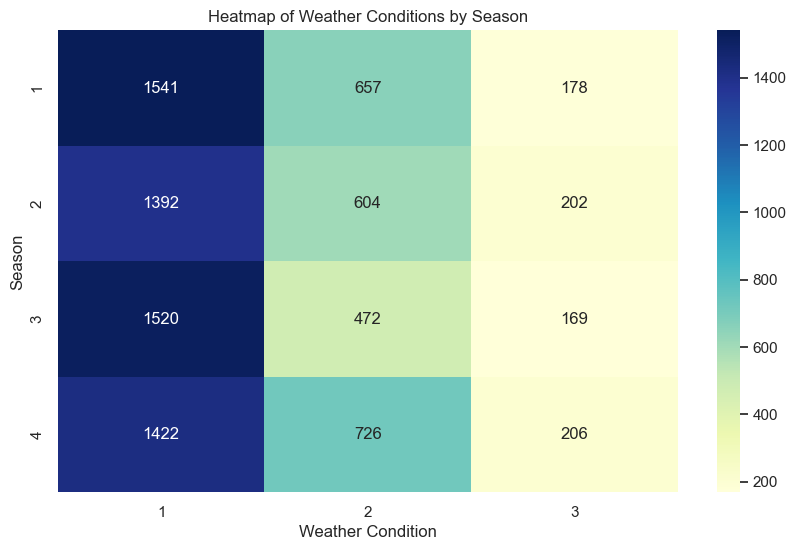

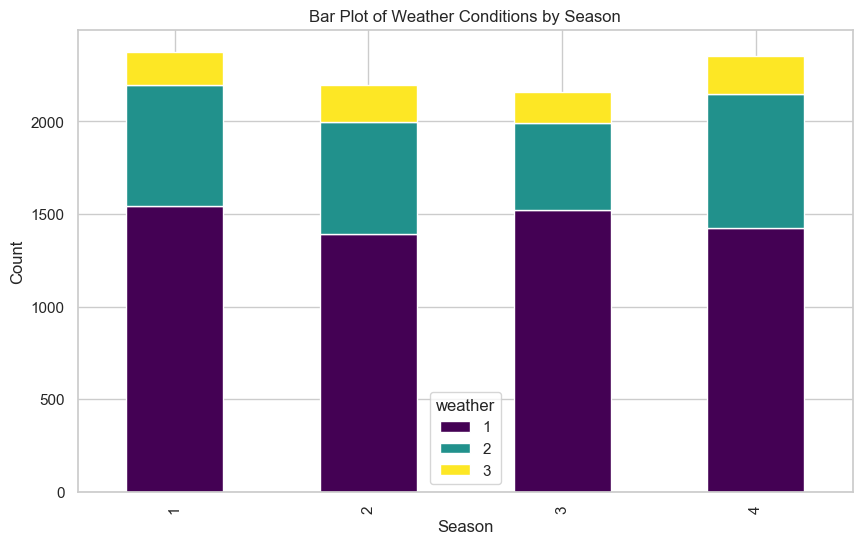

In [53]:
contingency_table = pd.crosstab(df['season'], df['weather'])
print(contingency_table)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

# Set the significance level
alpha = 0.05

if p <= alpha:
    print("Reject the null hypothesis (H0). There is a significant association between weather conditions and seasons.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant association between weather conditions and seasons.")

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Weather Conditions by Season')
plt.xlabel('Weather Condition')
plt.ylabel('Season')
plt.show()

# Visualize the counts using a bar plot
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Bar Plot of Weather Conditions by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

In [ ]:
Contingency Table:
This table shows the frequency distribution of weather conditions (1: Clear, Few clouds, Partly cloudy, Partly cloudy, 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog).
It displays how many occurrences of each weather condition exist in each season.

Explanation:

Interpretation:
We compare the p-value to the significance level (alpha = 0.05).
If p <= alpha, we reject the null hypothesis (H0) and conclude there is a significant association between weather conditions and seasons.
If p > alpha, we fail to reject the null hypothesis (H0), suggesting no significant association between weather conditions and seasons.

Heatmap:
Visualizes the contingency table using colors.
Provides an easy-to-read summary of the relationship between weather conditions and seasons.
The annotation (annot=True) displays the numerical values in each cell.

In [ ]:
Recommendations:
1.Adjust bike rental inventories based on predicted weather conditions in each season.Offer promotions or discounts 
  during seasons with lower demand to attract more customers.
2.Tailor marketing campaigns to promote bike rentals based on weather forecasts and seasonal patterns.
   Use data-driven insights to target specific customer segments during different seasons.
3.Implement a real-time monitoring system to adjust bike availability based on current weather conditions.
  Optimize staffing levels and operating hours based on predicted demand during different times of the year.
4.Explore the impact of other factors such as holidays, local events, or economic indicators on bike rental demand.
  Conduct customer surveys or focus groups to gather qualitative insights into customer preferences and behaviors.
5.Implement a real-time monitoring system to adjust bike availability based on current weather conditions.
   Optimize staffing levels and operating hours based on predicted demand during different times of the year.
6. Conduct customer surveys or focus groups to gather qualitative insights into customer preferences and behaviors.


Implementing these recommendations, you can enhance the accuracy of predictions, optimize operations, and improve customer satisfaction.
Continuously monitor and update your analysis as new data becomes available to ensure that your strategies remain effective 
